## 1

First we load and plot the data

In [11]:
#load libraries
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb #optional library
sb.set(font_scale=1.5) #make fonts bigger
%matplotlib inline 
#only needed for "live notebooks"

data = np.loadtxt('Homework/hw6_data.txt')

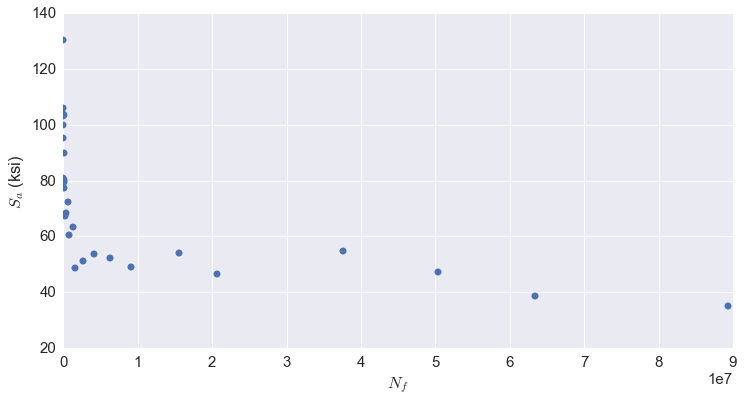

In [15]:
# plot data
plt.figure(figsize=(12,6))
plt.plot(data[:,0],data[:,1],'o')
plt.xlabel('$N_f$')
plt.ylabel('$S_a$ (ksi)')

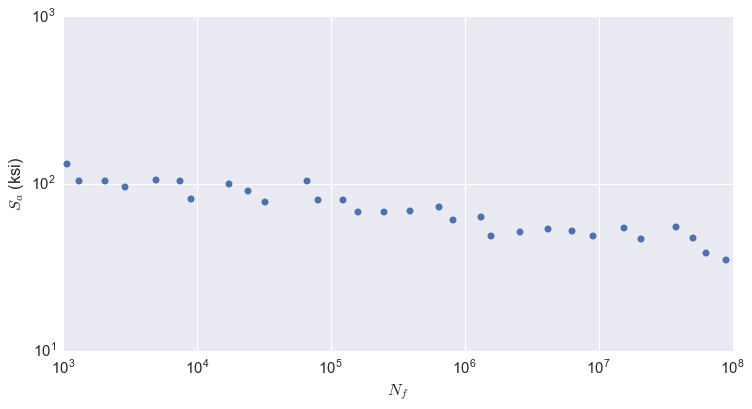

In [16]:
#plot data on log-log scale
plt.figure(figsize=(12,6))
plt.loglog(data[:,0],data[:,1],'o')
plt.xlabel('$N_f$')
plt.ylabel('$S_a$ (ksi)')

We can now use (15.8) to fit a line (linear in log-log) and find the material properties $\sigma_f^\prime$ and $b$.

In [17]:
from scipy.optimize import curve_fit #custom curve-fitting library
def fitfunc(Nf, sf, b):
    #eqn 15.8
    return sf*(2*Nf)**b
x = data[:,0]
y = data[:,1]
popt, pcov = curve_fit(fitfunc,x, y)

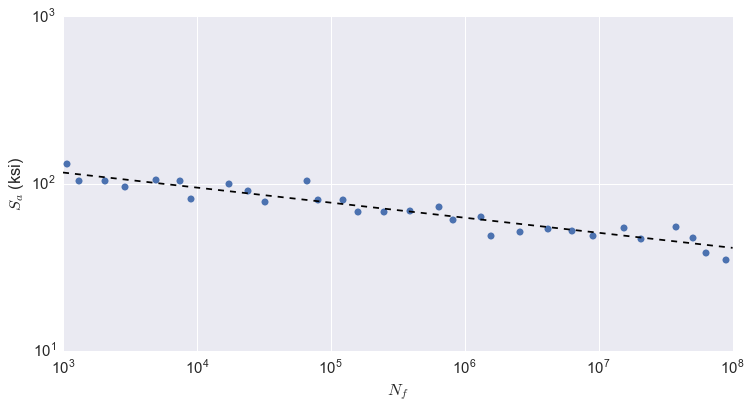

In [23]:
x_fit = np.logspace(3,8)
plt.figure(figsize=(12,6))
plt.loglog(data[:,0],data[:,1],'o')
plt.loglog(x_fit,fitfunc(x_fit, popt[0],popt[1]),'k--')
plt.xlabel('$N_f$')
plt.ylabel('$S_a$ (ksi)')

We can see that this is provides a very good fit for the data, so we identify the material parameters

In [28]:
s_f = popt[0]
b = popt[1]
print 's_f = %.1f, b=%.3f' % (popt[0],popt[1])

s_f = 231.0, b=-0.090


Thus $\sigma_f^\prime=231.0$ ksi and $b = -0.090$

## 2

To estimate the S-N curve for a non-zero mean stress, we use a conversion equation, such as the Goodman equation, the Morrow equation, or the Smith, Watson, and Topper equation. Solving the various equations for $\sigma_{ar}$ we find:

$$\sigma_{ar} = \frac{\sigma_a}{1-\frac{\sigma_m}{\sigma_u}} \qquad \text{Goodman}$$
$$\sigma_{ar} = \frac{\sigma_a}{1-\frac{\sigma_m}{\sigma_f^\prime}} \qquad \text{Morrow}$$
$$\sigma_{ar} = \sqrt{\sigma_{max}\sigma_a} \qquad \text{SWT}$$

For this material we have $\sigma_f^\prime = 231.0$ and $\sigma_m = 30 \text{ ksi}$. Since we do not know $\sigma_u$, and since the Goodman equation gives results that are generally less accurate than the Morrow equation, we will only compare the Morrow and SWT equations.

We can find $\sigma_{max}$ by adding $\sigma_a$ to $\sigma_m$

In [31]:
s_m = 30.0 #ksi, mean stress
s_ar_morrow = y/(1-s_m/s_f)
s_ar_swt = np.sqrt((y+s_m)*y)

We can compare the effects of these two methods of shifting the S-N curve graphically

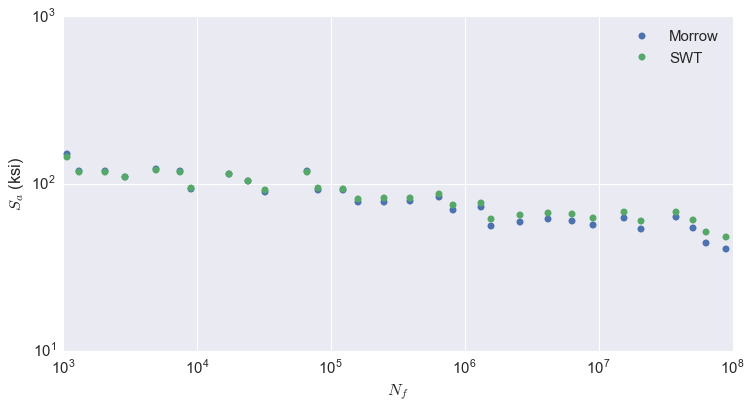

In [32]:
plt.figure(figsize=(12,6))
plt.loglog(x,s_ar_morrow,'o',label='Morrow')
plt.loglog(x,s_ar_swt,'o',label='SWT')
plt.legend(loc='best')
plt.xlabel('$N_f$')
plt.ylabel('$S_a$ (ksi)')

The data points are very similar, with a slight divergence at very high cycles. It is a little easier to compare the best-fit lines

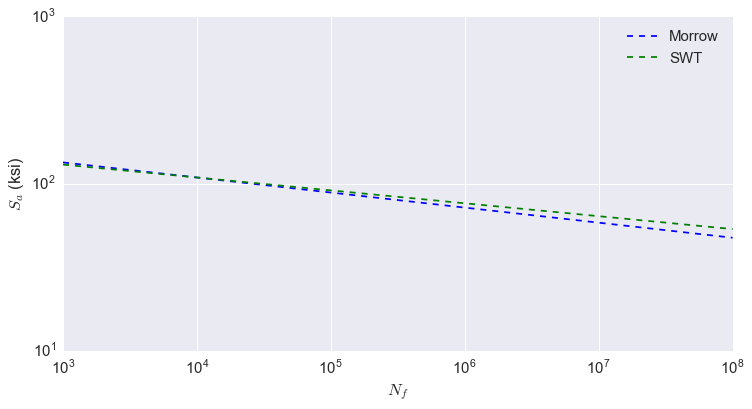

In [34]:
popt_morrow, pcov_morrow = curve_fit(fitfunc,x, s_ar_morrow)
popt_swt, pcov_swt = curve_fit(fitfunc,x, s_ar_swt)

x_fit = np.logspace(3,8)
plt.figure(figsize=(12,6))
plt.loglog(x_fit,fitfunc(x_fit, popt_morrow[0],popt_morrow[1]),'b--',label='Morrow')
plt.loglog(x_fit,fitfunc(x_fit, popt_swt[0],popt_swt[1]),'g--',label='SWT')
plt.legend(loc='best')
plt.xlabel('$N_f$')
plt.ylabel('$S_a$ (ksi)')

## 3

For mixed-mode loading, we can use the effective stress amplitudes

In [41]:
sx = 27.0
sy = 13.0
sz = 0.0
tauxy = 8.0
tauxz = 0.0
tauyz = 0.0

sa_eff = 1.0/np.sqrt(2)*np.sqrt((sx-sy)**2+(sy-sz)**2+(sz-sx)**2+6*(tauxy**2+tauyz**2+tauxz**2))

We can now use the data on Table 9.1 (p. 235) to find the properties for a zero-mean stress S-N curve for 2024-T4 aluminum, we find
$\sigma_f^\prime = 131 \text{ ksi}$ and $b=-0.102$

If we substitute $\sigma_a = \bar{\sigma_a}$, we can substitute that result into (15.8) and solve for $N_f$

$$N_f = \frac{\left( \frac{\bar{\sigma_a}}{\sigma_f^\prime} \right)^{1/b}}{2}$$

In [42]:
sf = 131.0
b=-0.102

Nf = ((sa_eff/sf)**(1.0/b))/2.0

In [43]:
Nf

2480556.8531319159

This means that at this constant amplitude stress level, we can expect failure after 2.48 million cycles.